# Import des modules

In [2]:
import pandas as pd
import numpy as np

# Lecture du fichier

Attention, le fichier commence par quelques lignes de commentaires.

In [3]:
df = pd.read_excel('Presidentielle_2017_Resultats_Communes_Tour_2_c.xls',
                  header = 3)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35719 entries, 0 to 35718
Data columns (total 32 columns):
Code du département       35719 non-null object
Libellé du département    35719 non-null object
Code de la commune        35719 non-null int64
Libellé de la commune     35719 non-null object
Inscrits                  35719 non-null int64
Abstentions               35719 non-null int64
% Abs/Ins                 35719 non-null float64
Votants                   35719 non-null int64
% Vot/Ins                 35719 non-null float64
Blancs                    35719 non-null int64
% Blancs/Ins              35719 non-null float64
% Blancs/Vot              35719 non-null float64
Nuls                      35719 non-null int64
% Nuls/Ins                35719 non-null float64
% Nuls/Vot                35719 non-null float64
Exprimés                  35719 non-null int64
% Exp/Ins                 35719 non-null float64
% Exp/Vot                 35719 non-null float64
N°Panneau                 

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,...,Voix,% Voix/Ins,% Voix/Exp,N°Panneau.1,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,Ain,1,L'Abergement-Clémenciat,598,100,16.72,498,83.28,37,...,272,45.48,60.04,2,F,LE PEN,Marine,181,30.27,39.96
1,1,Ain,2,L'Abergement-de-Varey,209,32,15.31,177,84.69,21,...,93,44.50,62.00,2,F,LE PEN,Marine,57,27.27,38.00
2,1,Ain,4,Ambérieu-en-Bugey,8586,2312,26.93,6274,73.07,601,...,3213,37.42,58.89,2,F,LE PEN,Marine,2243,26.12,41.11
3,1,Ain,5,Ambérieux-en-Dombes,1172,259,22.10,913,77.90,77,...,423,36.09,52.09,2,F,LE PEN,Marine,389,33.19,47.91
4,1,Ain,6,Ambléon,99,23,23.23,76,76.77,17,...,30,30.30,50.85,2,F,LE PEN,Marine,29,29.29,49.15


On sélectionne les colonnes qui nous intéressent et on les renomme pour les rendre plus facilement utilisables.

In [4]:
df = df[['Code du département', 'Libellé du département', 'Libellé de la commune', 'Abstentions', 'Blancs', 'Nuls', 'Nom', 'Voix', 'Nom.1', 'Voix.1']]
df.columns = ['Code Dept', 'Département', 'Commune', 'Abstentions', 'Blancs', 'Nuls', 'Nom', 'Macron', 'Nom.1', 'Le Pen']
df.head()

,Code Dept,Département,Commune,Abstentions,Blancs,Nuls,Nom,Macron,Nom.1,Le Pen
0,1,Ain,L'Abergement-Clémenciat,100,37,8,MACRON,272,LE PEN,181
1,1,Ain,L'Abergement-de-Varey,32,21,6,MACRON,93,LE PEN,57
2,1,Ain,Ambérieu-en-Bugey,2312,601,217,MACRON,3213,LE PEN,2243
3,1,Ain,Ambérieux-en-Dombes,259,77,24,MACRON,423,LE PEN,389
4,1,Ain,Ambléon,23,17,0,MACRON,30,LE PEN,29


On attaque un gros morceau : si on regarder le tableau juste au-dessus, on se rend compte qu'il ne respecte pas la première règle d'un tableau propre à l'exploitation. 1ère règle : une variable par colonne ! Ici nous avons 5 colonnes qui contiennent toutes des nombres de votes !

Nous allons remanier ce tableau, en faisant appel à une seule fonction très efficace : pd.melt().

In [5]:
df_clean = pd.melt(frame = df,
                  id_vars = ['Code Dept',
                             'Département',
                             'Commune'
                            ],
                  value_vars = ['Abstentions',
                                'Blancs',
                                'Nuls',
                                'Macron',
                                'Le Pen'
                               ],
                   var_name = 'Choix de vote',
                   value_name = 'Nombre de voix'
                  )

df_clean.head()

,Code Dept,Département,Commune,Choix de vote,Nombre de voix
0,1,Ain,L'Abergement-Clémenciat,Abstentions,100
1,1,Ain,L'Abergement-de-Varey,Abstentions,32
2,1,Ain,Ambérieu-en-Bugey,Abstentions,2312
3,1,Ain,Ambérieux-en-Dombes,Abstentions,259
4,1,Ain,Ambléon,Abstentions,23


C'est beaucoup plus propre !!

Maintenant, les résultats par commune. On se fait une petite fonction toute simple.

In [6]:
def resultats_commune(nom_commune):
    
    c_commune = df_clean['Commune'] == nom_commune
    
    for candidat in ['Macron', 'Le Pen']:
        res = df_clean[np.logical_and(c_commune,
                                      df_clean['Choix de vote'] == candidat)
                      ]['Nombre de voix'].mean()
        print(candidat, res)

    return

In [7]:
resultats_commune('Ramasse')

Macron 79.0
Le Pen 79.0


Dans combien de villes Marine Le Pen est-elle arrivée devant Emmanuel Macron ?

In [8]:
100 * (df['Le Pen'] > df['Macron']).sum() / df.shape[0]

25.725804193846411

# Graphiques

Maintenant, les résultats par département et pour tous les choix de vote !

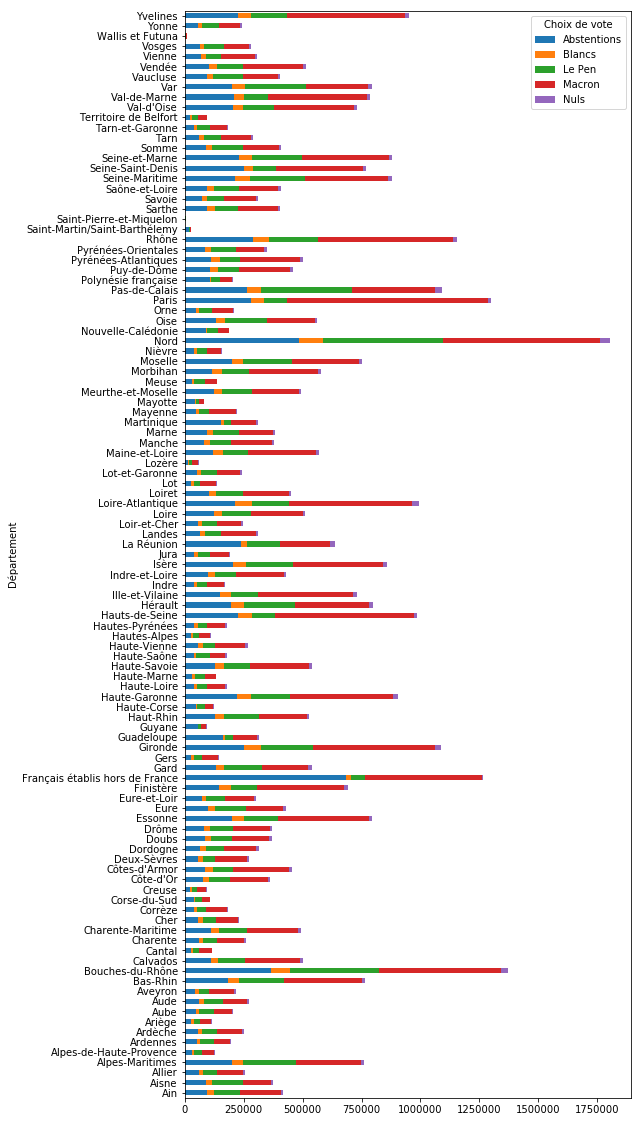

In [9]:
import matplotlib.pyplot as plt

df_clean.groupby(['Département', 'Choix de vote']) \
    .sum()['Nombre de voix'] \
    .sort_values() \
    .unstack('Choix de vote'). \
    plot(kind = 'barh',
         stacked = True,
         figsize = (8, 20))

plt.show()